In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

sns.set_theme(style="darkgrid")

#### skewness - a measure of asymmetry around the mean
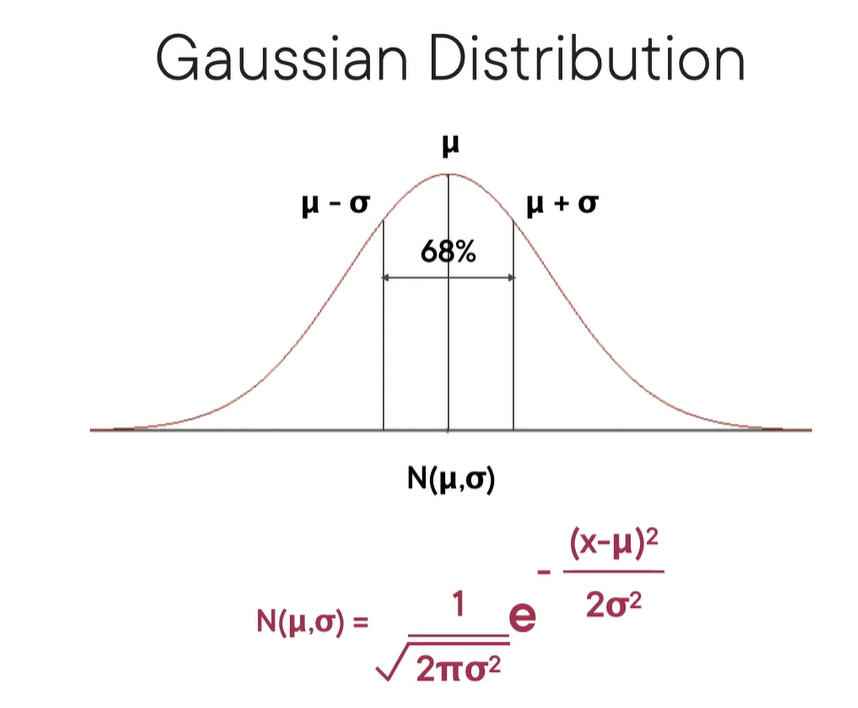

#### normally distributed data: skewness=0
#### extrememe values are equally likely on both sides of the mean
#### symmetry about the mean

#### Kurtosis - measure of how often extreme values (on either side of the mean) occur
#### normally distributed data: kurtosis = 3
#### excess kurtosis = kurtosis -3
#### kurtosis ~ tail risk, extreme events are likely to occur

In [2]:
sp_data = pd.read_csv('C:/Projects/learning/datasets/pl-foundations-statistics-probability-machine-learning/SP_500_1987.csv')
sp_data.head()

,Date,Open,High,Low,Close,AdjClose,Volume
0,31-Dec-1986,243.37,244.03,241.28,242.17,242.17,"13,92,00,000"
1,2-Jan-1987,242.17,246.45,242.17,246.45,246.45,"9,18,80,000"
2,5-Jan-1987,246.45,252.57,246.45,252.19,252.19,"18,19,00,000"
3,6-Jan-1987,252.20,253.99,252.14,252.78,252.78,"18,93,00,000"
4,7-Jan-1987,252.78,255.72,252.65,255.33,255.33,"19,09,00,000"


In [3]:
sp_data.describe()

,Open,High,Low,Close,AdjClose
count,253.000000,253.000000,253.000000,253.000000,253.000000
mean,286.964466,289.328063,284.412095,286.978617,286.978617
std,28.923683,28.241142,29.535528,28.889053,28.889053
min,223.980000,225.770000,216.460000,223.920000,223.920000
25%,267.840000,270.400000,264.310000,267.840000,267.840000
50%,290.520000,292.470000,288.340000,290.520000,290.520000
75%,308.940000,310.270000,307.420000,308.960000,308.960000
max,336.770000,337.890000,334.460000,336.770000,336.770000


In [4]:
sp_data.dtypes

Date         object
Open        float64
High        float64
Low         float64
Close       float64
AdjClose    float64
Volume       object
dtype: object

In [5]:
sp_data['Date'] = pd.to_datetime(sp_data['Date'])
sp_data.dtypes

Date        datetime64[ns]
Open               float64
High               float64
Low                float64
Close              float64
AdjClose           float64
Volume              object
dtype: object

Text(0.5, 1.0, 'S&P 500 1987')

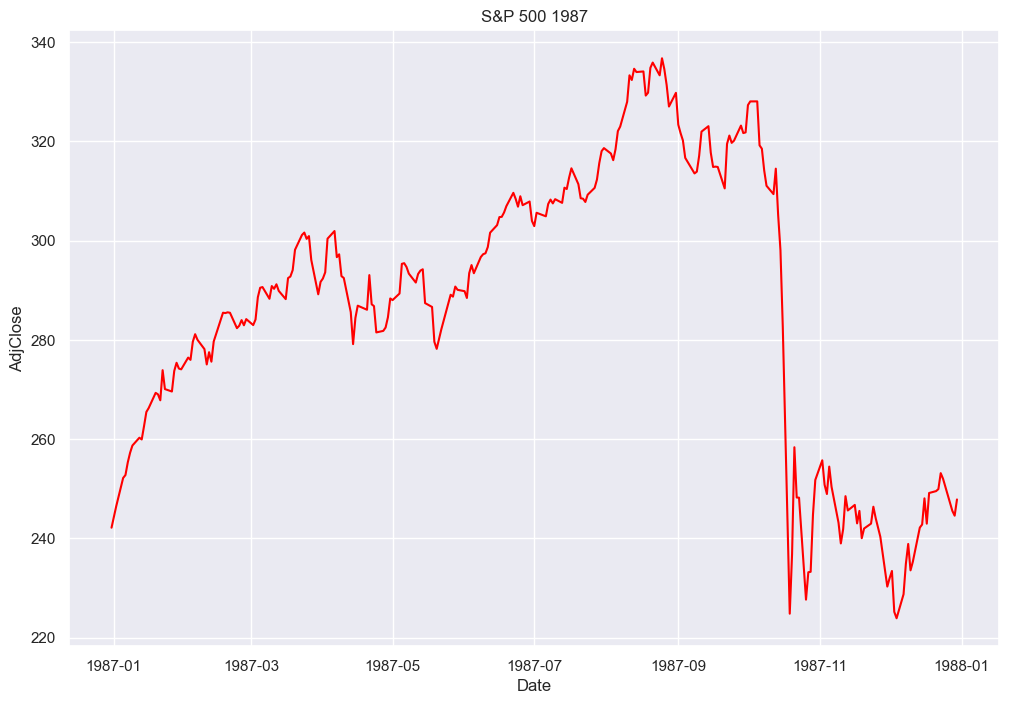

In [6]:
plt.figure(figsize=(12,8))
sns.lineplot(data=sp_data, x='Date', y='AdjClose', color='red')
plt.title('S&P 500 1987')

In [8]:
#drop na record
sp_data = sp_data.dropna()

# calculate returns for every day
sp_data['Returns'] = sp_data['AdjClose'].pct_change()
sp_data.head()

,Date,Open,High,Low,Close,AdjClose,Volume,Returns
1,1987-01-02,242.17,246.45,242.17,246.45,246.45,"9,18,80,000",NaN
2,1987-01-05,246.45,252.57,246.45,252.19,252.19,"18,19,00,000",0.023291
3,1987-01-06,252.20,253.99,252.14,252.78,252.78,"18,93,00,000",0.002340
4,1987-01-07,252.78,255.72,252.65,255.33,255.33,"19,09,00,000",0.010088
5,1987-01-08,255.36,257.28,254.97,257.28,257.28,"19,45,00,000",0.007637


In [9]:
sp_data = sp_data.dropna()
sp_data.head()

,Date,Open,High,Low,Close,AdjClose,Volume,Returns
2,1987-01-05,246.45,252.57,246.45,252.19,252.19,"18,19,00,000",0.023291
3,1987-01-06,252.20,253.99,252.14,252.78,252.78,"18,93,00,000",0.002340
4,1987-01-07,252.78,255.72,252.65,255.33,255.33,"19,09,00,000",0.010088
5,1987-01-08,255.36,257.28,254.97,257.28,257.28,"19,45,00,000",0.007637
6,1987-01-09,257.26,259.20,256.11,258.73,258.73,"19,30,00,000",0.005636


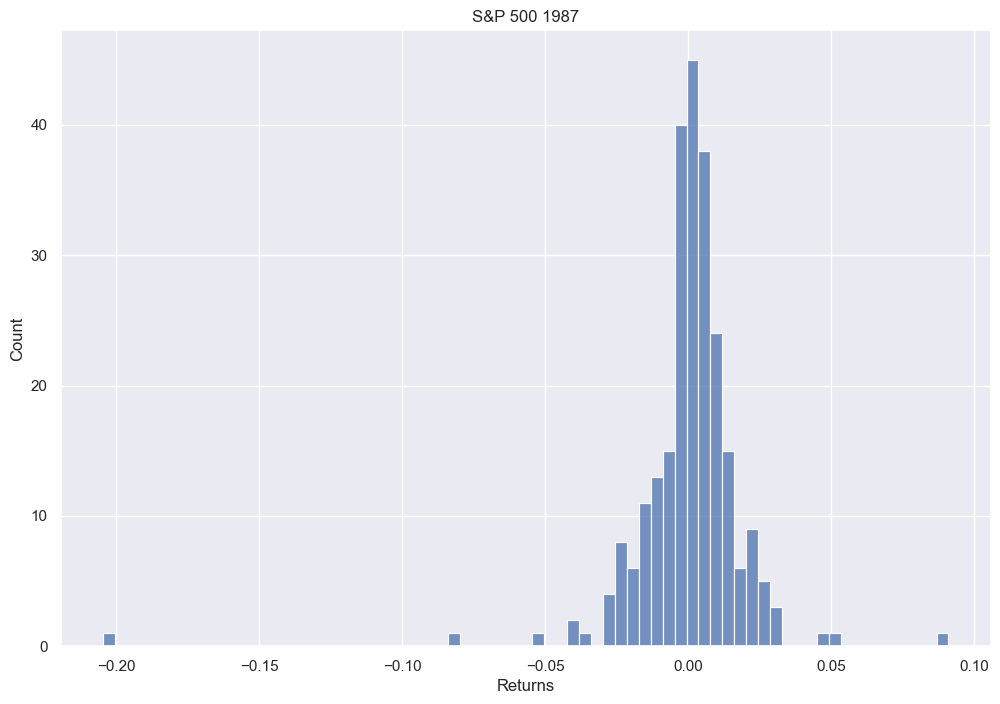

In [10]:
plt.figure(figsize=(12,8))
sns.histplot(data=sp_data, x='Returns')
plt.title('S&P 500 1987')
plt.show()

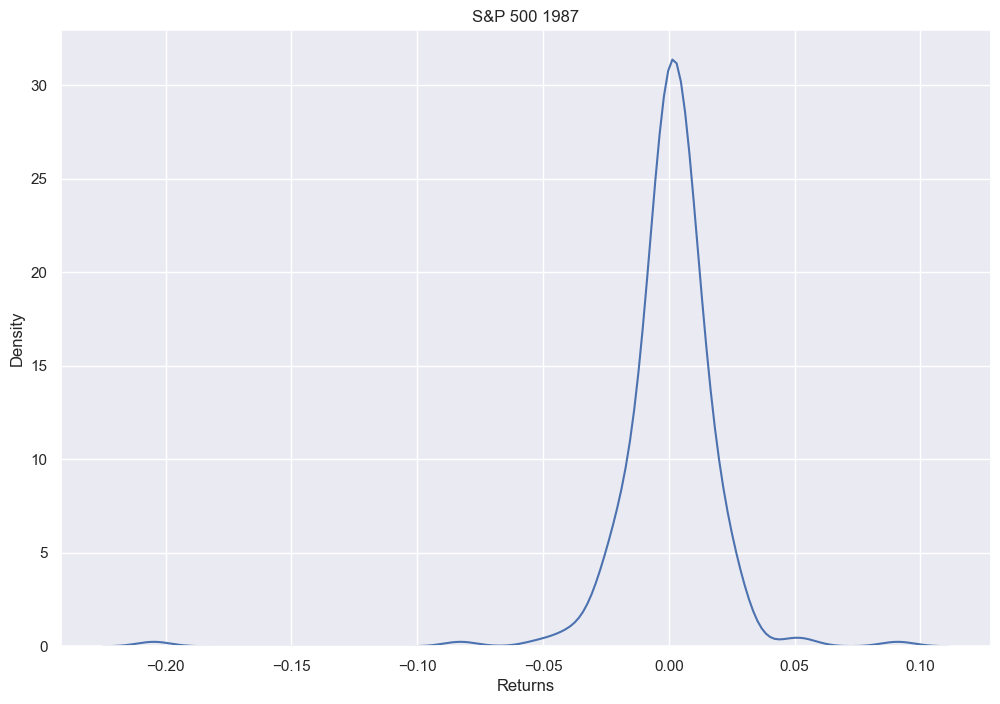

In [11]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=sp_data, x='Returns')
plt.title('S&P 500 1987')
plt.show()

In [12]:
sp_data['Returns'].skew(axis=0)

-4.065141155501739

In [13]:
sm.stats.stattools.robust_skewness(sp_data['Returns'])

(-4.040807042286311,
 0.01624018215051042,
 -0.12109648778740911,
 -0.0667731180046838)

In [17]:
sp_data['Returns'].kurtosis(axis=0)

43.3355334493596

In [18]:
sm.stats.stattools.robust_kurtosis(sp_data['Returns'], excess=True)

(42.45326764388656, 0.5353307105205782, 1.16832770123075, 1.3935078087601842)

In [23]:
sp_data_without_oct19 = sp_data[sp_data['Date'] != '1987-10-19']
sp_data_without_oct19.shape

(250, 8)

In [24]:
sm.stats.stattools.robust_skewness(sp_data_without_oct19['Returns'])

(0.025551768217964427,
 0.03156710459114486,
 -0.05366491996095297,
 -0.03574082729500861)

In [25]:
# removing one day crash shows that kurtosis was removed